# Додаткові завдання №4

## Задача 1.2.15
Нехай $\Omega = {1, 2, \ldots, 2n}$.
Всiм числам приписанi ймовiрностi, пропорцiйнi логарифмам цих чисел.
Знайти цi ймовiрностi.
Знайти ймовiрнiсть того, що в результатi експерименту з’явиться:
1. парне число;
2. непарне число.

### Завдання 1
Реалізуйте випадкову величину, описану в умові задачі, за допомогою класу [scipy.stats.rv_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html) в залежності від параметра $n$.

Створіть дві випадкові величини для:
- $n = 10$;
- $n = 25$.

In [3]:
from scipy.stats import rv_discrete
import numpy as np
import matplotlib.pyplot as plt
import math

def _pair_factorial(n):
    res = 1
    for i in range(2, 2 * n + 1, 2):
        res *= i
    return res


class task(rv_discrete):


    def rvs(self, n, size = 1):
        res = np.zeros(size)
        coef = 1 / (math.log(math.factorial(2 * n)))
        pairProb = coef * math.log(_pair_factorial(n))
        variants = (-1,1)     # pair = 1, not pair = -1
        for i in range(size):
            res[i] = np.random.choice(variants, p = (1-pairProb, pairProb))
        return res

    def pmf(self, arr, n):
        res = np.zeros(len(arr))
        coef = 1 / (math.log(math.factorial(2 * n)))
        pairProb = coef * math.log(_pair_factorial(n))
        variants = (-1, 1)  # pair = 1, not pair = -1
        for i in range(len(arr)):
            if arr[i] == - 1:
                res[i] = 1 - pairProb
            elif arr[i] == 1:
                res[i] = pairProb
        return res

    def cdf(self, arr, n):
        res = np.zeros(len(arr))
        coef = 1 / (math.log(math.factorial(2 * n)))
        pairProb = coef * math.log(_pair_factorial(n))
        for i in range(len(arr)):
            if arr[i] < - 1:
                res[i] = 0 
            elif -1 <= arr[i] <= 1:
                res[i] = pairProb
            else:
                res[i] = 1
        return res

    
a = task()


### Завдання 2
Зобразіть графічно функцію щільності, функцію розподілу та гістограму $10000$ значень отриманої випадкової величини в залежності від параметра $n$:
- $n = 10$;
- $n = 25$.

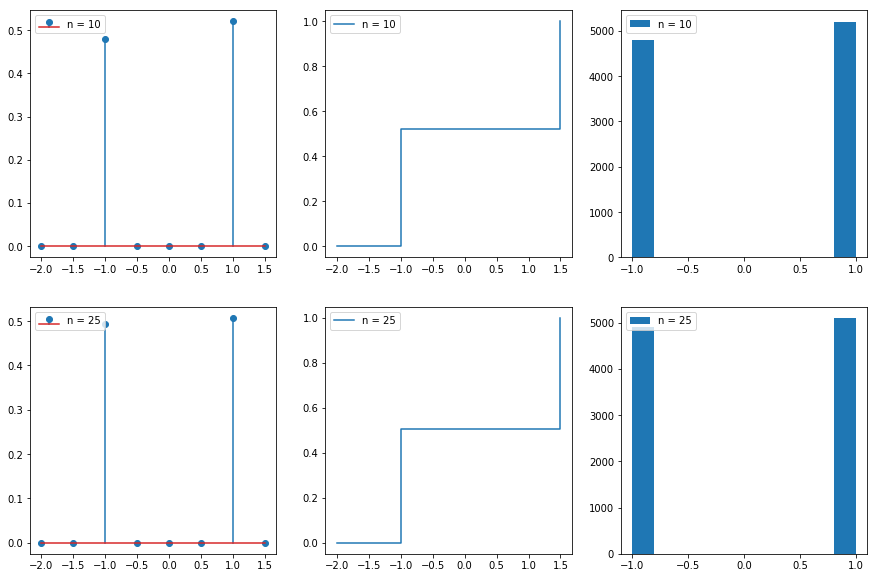

In [4]:
def build(data):
    f, axes = plt.subplots(2, 3, figsize = (15,10))
    for i,n in enumerate(data):
        rospod = task()
        arr = np.arange(-2,2,0.5)
        thickness = rospod.pmf(arr, n)
        rosp = rospod.cdf(arr, n)
        numbers = rospod.rvs(n, size=10000)
        axes[i, 0].stem(arr, thickness, label='n = {}'.format(n))
        axes[i, 1].plot(arr, rosp, drawstyle='steps-post', label='n = {}'.format(n))
        axes[i, 2].hist(numbers, label='n = {}'.format(n))
        for j in range(3):
            axes[i, j].legend(loc=2)
    plt.show()

data = [10, 25]
build(data)



### Завдання 3
Напишіть функцію для обрахунку теоретичної (через щільність отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [8]:
def theoretical(n):
    rospod = task()
    variants = (-1,1)
    res = rospod.pmf(variants,n)
    return res[0], res[1]


data = [10, 25]
for n in data:
    a, b = theoretical(n)
    print("n = {}: theoretical probability of pair number -- {}, not pair -- {}".format(n,b,a))

n = 10: theoretical probability of pair number -- 0.5205046299279228, not pair -- 0.4794953700720772
n = 25: theoretical probability of pair number -- 0.5073640739858903, not pair -- 0.49263592601410966


### Завдання 4
Напишіть функцію для обрахунку еміричної (симулюванням $1000000$ значень отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [2]:
import numpy, math
def empirical(n):
    coef = 1 / (math.log(math.factorial(2 * n)))
    res = 0
    nums = [i for i in range(1, 2 * n + 1)]
    for i in range(1000000):
        tmp = numpy.random.choice(nums, p=[coef * math.log(i) for i in nums])
        if tmp % 2 == 0:
            res += 1
    print("Empirical probability of appearance pair number -- {}".format(res / 1000000))
    print("Empirical probability of appearance not pair number -- {}".format(1 - res / 1000000))
    
empirical(10)
empirical(25)


Empirical probability of appearance pair number -- 0.520241
Empirical probability of appearance not pair number -- 0.47975900000000005
Empirical probability of appearance pair number -- 0.508132
Empirical probability of appearance not pair number -- 0.49186799999999997
